In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in csv file
shootings_df = pd.read_csv("Stanford_MSA_Shooting.csv",encoding="utf-8-sig")
shootings_df.head()

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,...,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,...,http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,...,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
4,5,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS,1,NaN,6/21/2016


In [3]:
#grab needed columns in DF
shootings_df = shootings_df[["Title", "City", "State", "Latitude", "Longitude", "Number of Civilian Fatalities",
  "Number of Civilian Injured", "Number of Enforcement Fatalities", 
  "Number of Enforcement Injured","Total Number of Victims","Date", "Type of Gun - General",
  "Total Number of Guns", "Relationship to Incident Location"]]

#split out year from date column
shootings_df["Year"] = pd.DatetimeIndex(shootings_df["Date"]).year

#check DF
shootings_df.head()


,Title,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Victims,Date,Type of Gun - General,Total Number of Guns,Relationship to Incident Location,Year
0,University of Texas at Austin,Austin,Texas,30.198887,-97.844159,15,32,1,0,48,8/1/1966,Multiple guns,7,Place of schooling,1966
1,Rose-Mar College of Beauty,Mesa,Arizona,33.422687,-111.816320,5,1,0,0,6,11/12/1966,Handgun,1,None,1966
2,New Orleans Police Shootings,New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,22,12/31/1972,Multiple guns,2,Local government,1972
3,Clara Barton Elementary School,Chicago,Illinois,41.839280,-87.688181,1,3,0,0,4,1/17/1974,Handgun,2,Place of schooling,1974
4,Olean High School,Olean,New York,42.081854,-78.432139,3,7,0,0,10,12/30/1974,Multiple guns,2,Place of schooling,1974


In [4]:
#data cleaning/ fill in empty cells
shootings_df["Relationship to Incident Location"] = shootings_df["Relationship to Incident Location"].replace(
    {"Place of Residency": "Place of residency", "Place of Recreation": "Place of recreation",
    "Place of Business/employment": "Place of business/employment", "Residential home/Neighborhood": "Place of residency" })

shootings_df["Type of Gun - General"].nunique()

#shootings_df["Type of Gun - General"] = shootings_df["Type of Gun - General"].replace({"handgun": "Handgun", "Multiple Guns": "Multiple guns",
#                                                                                      "Multiple guns\r\n": "Multiple guns", "\r\nMultiple guns": "Multiple guns",
#                                                                                      "Semi-Automatic Rifle": "Rifle", "9-mm": "Handgun"})

shootings_df["Type of Gun - General"] = shootings_df["Type of Gun - General"].replace({"\r\nMultiple guns": "Multiple guns", "Multiple Guns": "Multiple guns", "Multiple guns\r\n":"Multiple guns",
                                                                                       "9-mm":"Handgun","handgun":"Handgun","Semi-Automatic Rifle":"Rifle"})


In [5]:
#Group by gun type to get victim count
weapons_group = shootings_df.groupby(["Type of Gun - General"])
weapons_group = weapons_group[["Total Number of Victims"]].sum()
weapons_group = weapons_group.reset_index(drop=False)
#check DF
weapons_group

,Type of Gun - General,Total Number of Victims
0,Handgun,1025
1,Multiple guns,926
2,Rifle,224
3,Shotgun,84
4,Unknown,357


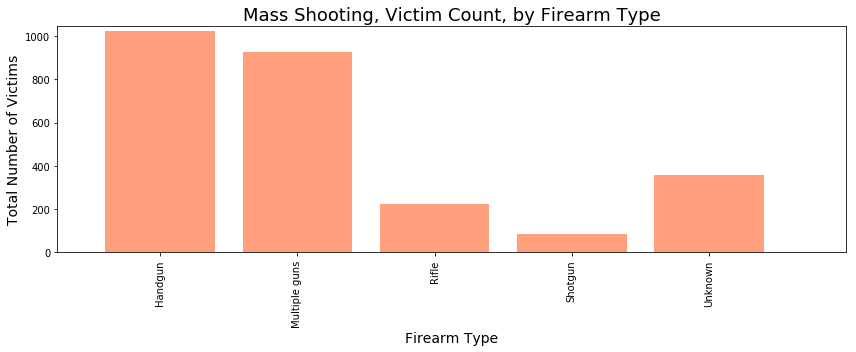

In [38]:
#Build bar chart for mass shooting victim count
x_axis = np.arange(len(weapons_group))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(x_axis, weapons_group["Total Number of Victims"], color="coral", alpha=0.75, align="center")
plt.xticks(tick_locations, weapons_group["Type of Gun - General"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(weapons_group["Total Number of Victims"])+ 20)
plt.title("Mass Shooting, Victim Count, by Firearm Type", fontsize=18)
plt.xlabel("Firearm Type", fontsize=14)
plt.ylabel("Total Number of Victims",fontsize=14)
plt.tight_layout()
plt.savefig("victim_cnt_by_firearm_bar_chart.png")
plt.show()

In [7]:
#Create variables for pie chart (percent fatalities by firearm type)
total_fatality_cnt = weapons_group["Total Number of Victims"].sum()
total_fatality_cnt
pct_fatality_by_weapon = round(weapons_group["Total Number of Victims"] / total_fatality_cnt, 2)
pct_fatality_by_weapon

weapons_group["Percent Fatality"] = pct_fatality_by_weapon
weapons_group

,Type of Gun - General,Total Number of Victims,Percent Fatality
0,Handgun,1025,0.39
1,Multiple guns,926,0.35
2,Rifle,224,0.09
3,Shotgun,84,0.03
4,Unknown,357,0.14


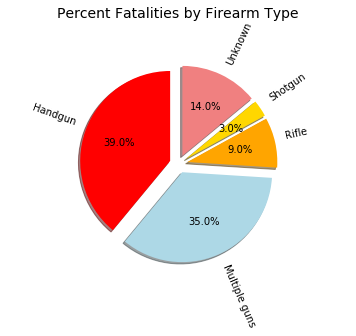

In [32]:
#-------------------------------------------
# Build Pie Chart
#-------------------------------------------
# Labels for the sections of our pie chart
labels = [label for label in weapons_group["Type of Gun - General"] ]

# The values of each section of the pie chart
sizes = [size for size in weapons_group["Percent Fatality"]]

# The colors of each section of the pie chart
colors = ["red", "lightblue", "orange", "gold","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90,rotatelabels=True)
plt.title("Percent Fatalities by Firearm Type",pad=38,fontsize=14)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.savefig("pct_fatality_by_firearm_pie_chart.png")
plt.show()